In [1]:
import pandas as pd

In [2]:
single=pd.read_csv('project_single_pred_result_3.0.csv')

In [14]:
single=single.iloc[:,1:6]

In [20]:
single

,char,code,acc,correct,total
0,一,0,0.923077,12.000001,13
1,丁,1,0.888889,8.000000,9
2,七,2,0.666667,6.000000,9
3,丈,3,1.000000,4.000000,4
4,三,4,0.785714,11.000001,14
...,...,...,...,...,...
1968,鼠,1994,0.333333,1.000000,3
1969,龙,1995,0.940000,47.000000,50
1970,龚,1996,1.000000,8.000000,8
1971,龛,1997,1.000000,2.000000,2


In [4]:
multi=pd.read_csv('project_multi_pred_result_3.0.csv')

In [5]:
multi

,Unnamed: 0,char,code,acc,correct,total
0,0,一,0,0.923077,12.000001,13
1,1,丁,1,1.000000,9.000000,9
2,2,七,2,0.888889,8.000000,9
3,3,丈,3,1.000000,4.000000,4
4,4,三,4,0.857143,12.000001,14
...,...,...,...,...,...,...
1968,1968,鼠,1994,0.000000,0.000000,3
1969,1969,龙,1995,0.960000,47.999999,50
1970,1970,龚,1996,1.000000,8.000000,8
1971,1971,龛,1997,1.000000,2.000000,2


In [6]:
multi = multi.rename(columns={'acc': 'acc_mul','correct': 'correct_mul'})

In [19]:
multi=multi.iloc[:,2:5]

In [21]:
result = pd.merge(single,
                 multi,
                 on='code')

In [22]:
result

,char,code,acc,correct,total,acc_mul,correct_mul
0,一,0,0.923077,12.000001,13,0.923077,12.000001
1,丁,1,0.888889,8.000000,9,1.000000,9.000000
2,七,2,0.666667,6.000000,9,0.888889,8.000000
3,丈,3,1.000000,4.000000,4,1.000000,4.000000
4,三,4,0.785714,11.000001,14,0.857143,12.000001
...,...,...,...,...,...,...,...
1968,鼠,1994,0.333333,1.000000,3,0.000000,0.000000
1969,龙,1995,0.940000,47.000000,50,0.960000,47.999999
1970,龚,1996,1.000000,8.000000,8,1.000000,8.000000
1971,龛,1997,1.000000,2.000000,2,1.000000,2.000000


In [ ]:
result

In [26]:
zero=result[result['acc']==0]

In [28]:
zero.sort_values(by=['correct_mul'], ascending=False)

,char,code,acc,correct,total,acc_mul,correct_mul
1458,虹,1476,0.0,0.0,6,0.833333,5.0
1300,绮,1314,0.0,0.0,6,0.833333,5.0
1717,遐,1738,0.0,0.0,5,1.000000,5.0
1051,狼,1063,0.0,0.0,5,1.000000,5.0
770,普,776,0.0,0.0,4,1.000000,4.0
...,...,...,...,...,...,...,...
1432,蒿,1449,0.0,0.0,1,0.000000,0.0
1444,薇,1461,0.0,0.0,2,0.000000,0.0
1451,苹,1469,0.0,0.0,1,0.000000,0.0
1050,狭,1062,0.0,0.0,1,0.000000,0.0


In [39]:
increase=result[result['acc_mul'] > result['acc']]

In [41]:
increase['improve'] = increase['correct_mul'] - increase['correct']

<ipython-input-41-278cdfc2a028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase['improve'] = increase['correct_mul'] - increase['correct']


In [68]:
zero_3=result[result['acc_mul']>0.5]

In [69]:
zero_3.sort_values(by=(['total']), ascending=False)

,char,code,acc,correct,total,acc_mul,correct_mul
310,当,311,0.968750,66.843750,69,1.000000,69.000000
32,云,32,0.950000,57.000003,60,0.866667,52.000004
1877,风,1900,0.740741,40.000002,54,0.981481,53.000001
1969,龙,1995,0.940000,47.000000,50,0.960000,47.999999
893,气,902,0.959184,46.999998,49,0.938775,45.999999
...,...,...,...,...,...,...,...
94,俘,95,1.000000,1.000000,1,1.000000,1.000000
96,俨,97,1.000000,1.000000,1,1.000000,1.000000
1140,硕,1154,0.000000,0.000000,1,1.000000,1.000000
150,冢,151,0.000000,0.000000,1,1.000000,1.000000


In [61]:
zero_3['total']

0       13
1        9
2        9
3        4
4       14
        ..
1967    11
1969    50
1970     8
1971     2
1972     8
Name: total, Length: 1654, dtype: int64

In [66]:
zero_3['total'].value_counts().mean()

11.4375

In [67]:
zero_3['total'].value_counts().median()

5.0

In [63]:
zero_3['total'].value_counts().mean()

33.755102040816325

In [70]:
zero_3['total'].value_counts().median()

7.0

<AxesSubplot:>

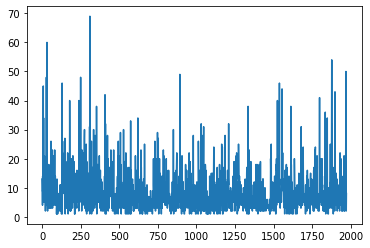

In [58]:
zero_3['total'].plot()

<AxesSubplot:>

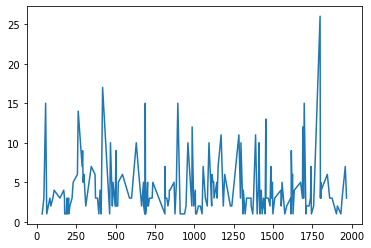

In [55]:
zero_3['total'].plot()

In [43]:
increase.sort_values(by=(['improve']), ascending=False)

,char,code,acc,correct,total,acc_mul,correct_mul,improve
1877,风,1900,0.740741,40.000002,54,0.981481,53.000001,12.999999
1188,空,1202,0.307692,4.000000,13,0.923077,12.000001,8.000001
377,奸,378,0.500000,8.000000,16,1.000000,16.000000,8.000000
1090,男,1102,0.111111,1.000000,9,1.000000,9.000000,8.000000
748,无,754,0.551724,16.000000,29,0.827586,23.999999,7.999999
...,...,...,...,...,...,...,...,...
1740,郡,1761,0.933333,14.000001,15,1.000000,15.000000,0.999999
1664,辉,1685,0.933333,14.000001,15,1.000000,15.000000,0.999999
528,异,530,0.966667,29.000001,30,1.000000,30.000000,0.999999
1770,银,1792,0.954545,21.000001,22,1.000000,22.000000,0.999999


In [35]:
decrease=result[result['acc_mul'] < result['acc']]

In [46]:
decrease['change'] = decrease['correct'] - decrease['correct_mul']

<ipython-input-46-5987f2ebadd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decrease['change'] = decrease['correct'] - decrease['correct_mul']


In [47]:
decrease.sort_values(by=(['change']), ascending=False)

,char,code,acc,correct,total,acc_mul,correct_mul,change
1800,间,1823,0.846154,22.000000,26,0.346154,9.000000,13.000000
689,损,694,1.000000,15.000000,15,0.200000,3.000000,12.000000
308,尝,309,0.870968,27.000000,31,0.645161,19.999999,7.000001
987,泽,998,0.750000,9.000000,12,0.166667,2.000000,7.000000
263,合,264,0.857143,12.000001,14,0.428571,6.000000,6.000000
...,...,...,...,...,...,...,...,...
764,晓,770,1.000000,15.000000,15,0.933333,14.000001,0.999999
953,渊,964,0.863636,19.000000,22,0.818182,18.000001,0.999999
334,采,335,1.000000,30.000000,30,0.966667,29.000001,0.999999
337,报,338,0.875000,21.000000,24,0.833333,20.000001,0.999999


In [29]:
zero_2=result[result['acc_mul']==0]

In [33]:
zero_2=zero_2[zero_2['acc']!=0]

In [34]:
zero_2.sort_values(by=['correct'], ascending=False)

,char,code,acc,correct,total,acc_mul,correct_mul
1120,眉,1132,1.000000,5.0,5,0.0,0.0
484,巨,486,0.800000,4.0,5,0.0,0.0
1498,装,1516,1.000000,4.0,4,0.0,0.0
887,毒,896,0.600000,3.0,5,0.0,0.0
402,嫁,403,0.750000,3.0,4,0.0,0.0
299,商,300,0.333333,2.0,6,0.0,0.0
1621,贝,1642,0.400000,2.0,5,0.0,0.0
1676,输,1697,0.400000,2.0,5,0.0,0.0
1185,秽,1199,1.000000,2.0,2,0.0,0.0
1230,篮,1244,1.000000,2.0,2,0.0,0.0
